# Initial Review of the UT-Smoke data set

This is an initial feasibility study into reproducing the results as documented in the research paper <here>

## Libraries

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

pd.set_option("display.max_columns", None)

## Modules

In [25]:
#If you don't have it then you'll need to add it to load the excel worksheets. Upgrade pip while we are at it
!pip install openpyxl
!python -m pip install --upgrade pip


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python -m pip install --upgrade pip
  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.1
    Uninstalling pip-22.2.1:
      Successfully uninstalled pip-22.2.1


## Get Data Set

**Warning!** The data set is large in size > 2G **Warning!**. I have **commented the curl command to you have to explicitly uncomment to download the file**

In [4]:
!pwd

/Users/ddealmei/code/Dekkerz/mocap/notebooks


In [5]:
#!curl "https://www.utwente.nl/en/eemcs/ps/dataset-folder/ut-smoking-data.rar" > ../data/external/ut-smoking-data.rar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2058M  100 2058M    0     0  1223k      0  0:28:43  0:28:43 --:00:01 1772k055k      0  0:33:17  0:00:31  0:32:46 2151kM    3 76.9M    0     0  1395k      0  0:25:10  0:00:56  0:24:14 1749k31k      0  0:24:33  0:01:01  0:23:32 1832k0  1145k      0  0:30:39  0:01:26  0:29:13  318k  0:32:04  0:01:31  0:30:33  275k      0  0:32:14  0:01:32  0:30:42  267k7k      0  0:33:13  0:01:36  0:31:37  316k    0  0:37:57  0:01:57  0:36:00  324k37  321k      0  0:42:49  0:02:22  0:40:27  325k 0   804k      0  0:43:41  0:02:27  0:41:14  339k28k      0  0:48:15  0:02:52  0:45:23  304k      0  0:48:23  0:02:53  0:45:30  325k 0   714k      0  0:49:09  0:02:57  0:46:12  256k705k      0  0:49:46  0:03:01  0:46:45  306k    0  0:51:43  0:03:15  0:48:28  348k 330k661k      0  0:53:06  0:03:25  0:49:41  313k  0   657k      0  0:53:27  0:03:28  0:49:59  

In [6]:
#Confirm filesize should be 2G
!ls -lh ../data/external/ut-smoking-data.rar

-rw-r--r--  1 ddealmei  staff   2.0G Nov 29 20:26 ../data/external/ut-smoking-data.rar


***Using tar getting error unpacking one of the files***

UT_Smoking_Data/Participant2_Extra_SW_SG_W.xlsx: Parsing filters is unsupported.

Installing unar locally to unpack. Command below is only for mac-OSX

In [9]:
!brew install unar

To reinstall 1.10.7_1, run:
  brew reinstall unar


In [11]:
!unar ../data/external/ut-smoking-data.rar -output-directory ../data/external

../data/external/ut-smoking-data.rar: RAR
"../data/external/UT_Smoking_Data" already exists.
(r)ename to "UT_Smoking_Data-1", (R)ename all, (o)verwrite, (O)verwrite all, (s)kip, (S)kip all, (q)uit? ^C


In [15]:
!ls -lh ../data/external/UT_Smoking_Data

total 4539768
-rw-r--r--  1 ddealmei  staff   104M Apr 26  2016 Participant10_Data.xlsx
-rw-r--r--  1 ddealmei  staff    98M May 10  2016 Participant11_Data.xlsx
-rw-r--r--  1 ddealmei  staff   229M Apr 26  2016 Participant1_Data.xlsx
-rw-r--r--  1 ddealmei  staff   106M May 10  2016 Participant1_Extra_SW_SG_W.xlsx
-rw-r--r--  1 ddealmei  staff   248M Apr 26  2016 Participant2_Data.xlsx
-rw-r--r--  1 ddealmei  staff   115M May 10  2016 Participant2_Extra_SW_SG_W.xlsx
-rw-r--r--  1 ddealmei  staff   257M Apr 26  2016 Participant3_Data.xlsx
-rw-r--r--  1 ddealmei  staff   118M May 11  2016 Participant3_Extra_SW_SG_W.xlsx
-rw-r--r--  1 ddealmei  staff   196M Apr 26  2016 Participant4_Data.xlsx
-rw-r--r--  1 ddealmei  staff    29M May 10  2016 Participant4_Extra_SG.xlsx
-rw-r--r--  1 ddealmei  staff   100M May 10  2016 Participant5_Data.xlsx
-rw-r--r--  1 ddealmei  staff    15M May 11  2016 Participant5_SG.xlsx
-rw-r--r--  1 ddealmei  staff   101M May 10  2016 Participant6_Data.xlsx
-rw-r-

## Feature Exploration

## There are total 11 participants for smoking data. Each file shows data for each participant. Such as Has_Data, Sho_Data etc. 

There are some extra files for 4 participants with shortcuts such as SW(smoking while walking:SmokeWK), SG(smoking in a group:SmokeGP), and W ( just walking:walk). These four participants performed extra activities

- -rw-r--r--  1 ddealmei  staff   106M May 10  2016 Participant1_Extra_SW_SG_W.xlsx
- -rw-r--r--  1 ddealmei  staff   115M May 10  2016 Participant2_Extra_SW_SG_W.xlsx
- -rw-r--r--  1 ddealmei  staff   118M May 11  2016 Participant3_Extra_SW_SG_W.xlsx
- -rw-r--r--  1 ddealmei  staff    29M May 10  2016 Participant4_Extra_SG.xlsx
- -rw-r--r--  1 ddealmei  staff    15M May 11  2016 Participant5_SG.xlsx
- -rw-r--r--  1 ddealmei  staff    15M May 11  2016 Participant6_SG.xlsx
- -rw-r--r--  1 ddealmei  staff    12M Feb 22  2017 Participant7_SG.xlsx
- -rw-r--r--  1 ddealmei  staff    15M May 11  2016 Participant8_SG.xlsx

All the particitantname_Data files contains the standard activities such as smoking while sitting (SmokeST), smoking while standing(SmokeSD), Eating, Drinking while sitting (DrinkST), drinking while standing (DrinkSD), standing (Stand), and sitting (Sit). 

- -rw-r--r--  1 ddealmei  staff   104M Apr 26  2016 Participant10_Data.xlsx
- -rw-r--r--  1 ddealmei  staff    98M May 10  2016 Participant11_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   229M Apr 26  2016 Participant1_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   248M Apr 26  2016 Participant2_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   257M Apr 26  2016 Participant3_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   196M Apr 26  2016 Participant4_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   100M May 10  2016 Participant5_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   101M May 10  2016 Participant6_Data.xlsx
- -rw-r--r--  1 ddealmei  staff    87M May 10  2016 Participant7_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   101M May 10  2016 Participant8_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   127M Apr 26  2016 Participant9_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   9.5K Jan 19  2018 Participants_info.xlsx


Within each file, the first part is watch data, then empty colum and then phone data.  The order is as follows:

Watch Data:
- timestamp
- Accelerometer(x,y,z)
- Linear acceleration sensor(x,y,z)
- Gyroscope(x,y,z)
- magnetometer(x,y,z)
- pressure sensor
- heartratesensor

Empty colum

Phone Data:
- timestamp
- Accelerometer(x,y,z)
- Linear acceleration sensor(x,y,z)
- Gyroscope(x,y,z),magnetometer(x,y,z)
- gps(lat, long)

Last coulmn is the class label. 

Contents of the Participants info excel sheet

- -rw-r--r--  1 ddealmei  staff   9.5K Jan 19  2018 Participants_info.xlsx

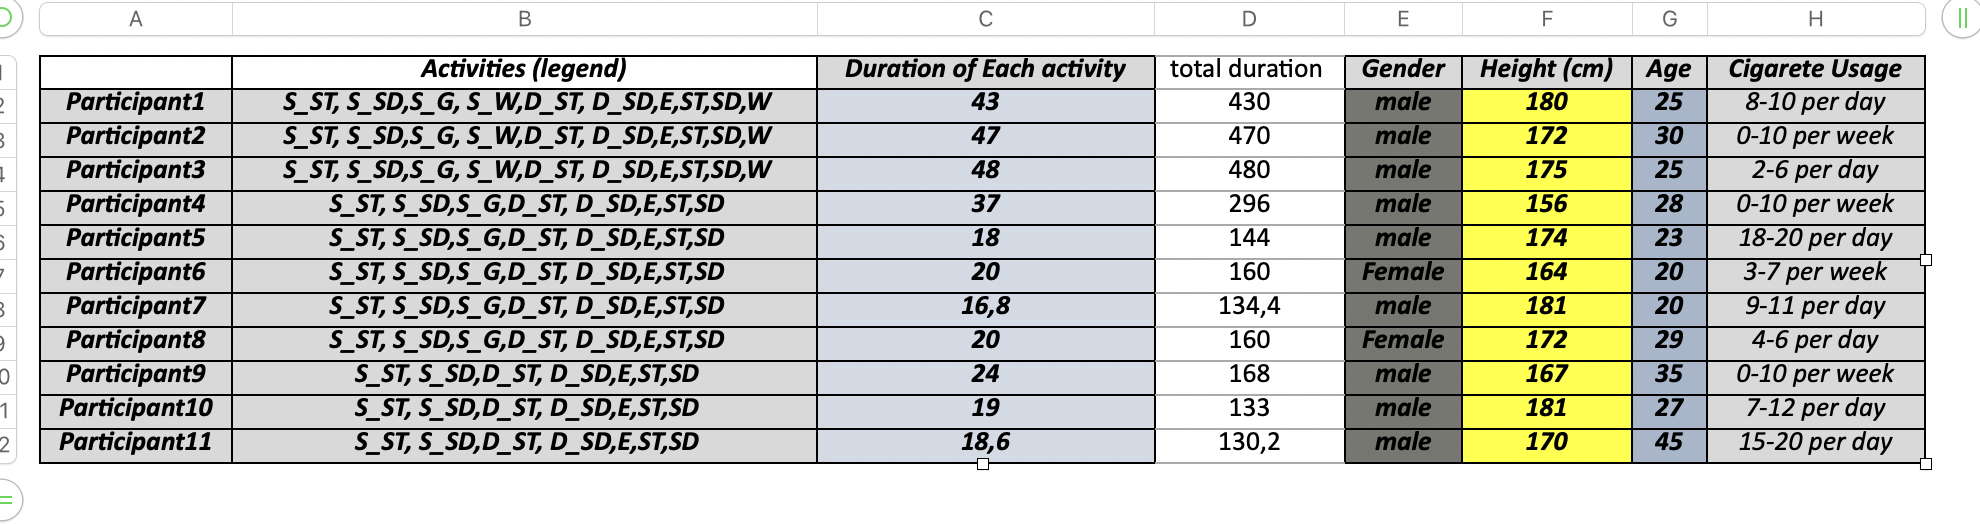

For details about the dataset, please read the data collection section of the following paper:
Shoaib, Muhammad, Hans Scholten, Paul JM Havinga, and Ozlem Durmaz Incel. "A hierarchical lazy smoking detection algorithm using smartwatch sensors." In e-Health Networking, Applications and Services (Healthcom), 2016 IEEE 18th International Conference on, pp. 1-6. IEEE, 2016.

Link requires registration, PDF version available with dataset

- -rw-r--r--  1 ddealmei  staff   327K Jul 18  2016 Smoking_Paper.pdf
- https://ieeexplore.ieee.org/document/7749439

**Relevant Extracts from the research paper**

- Our 45-hour dataset contains 17 hours of smoking while walking, standing, sitting, and while conversing in a group collected over a three months’ period. As far as we know, this is the largest dataset compared with similar studies, as we discuss in Section II. For reproducibility, we make our data logger and dataset publicly available.

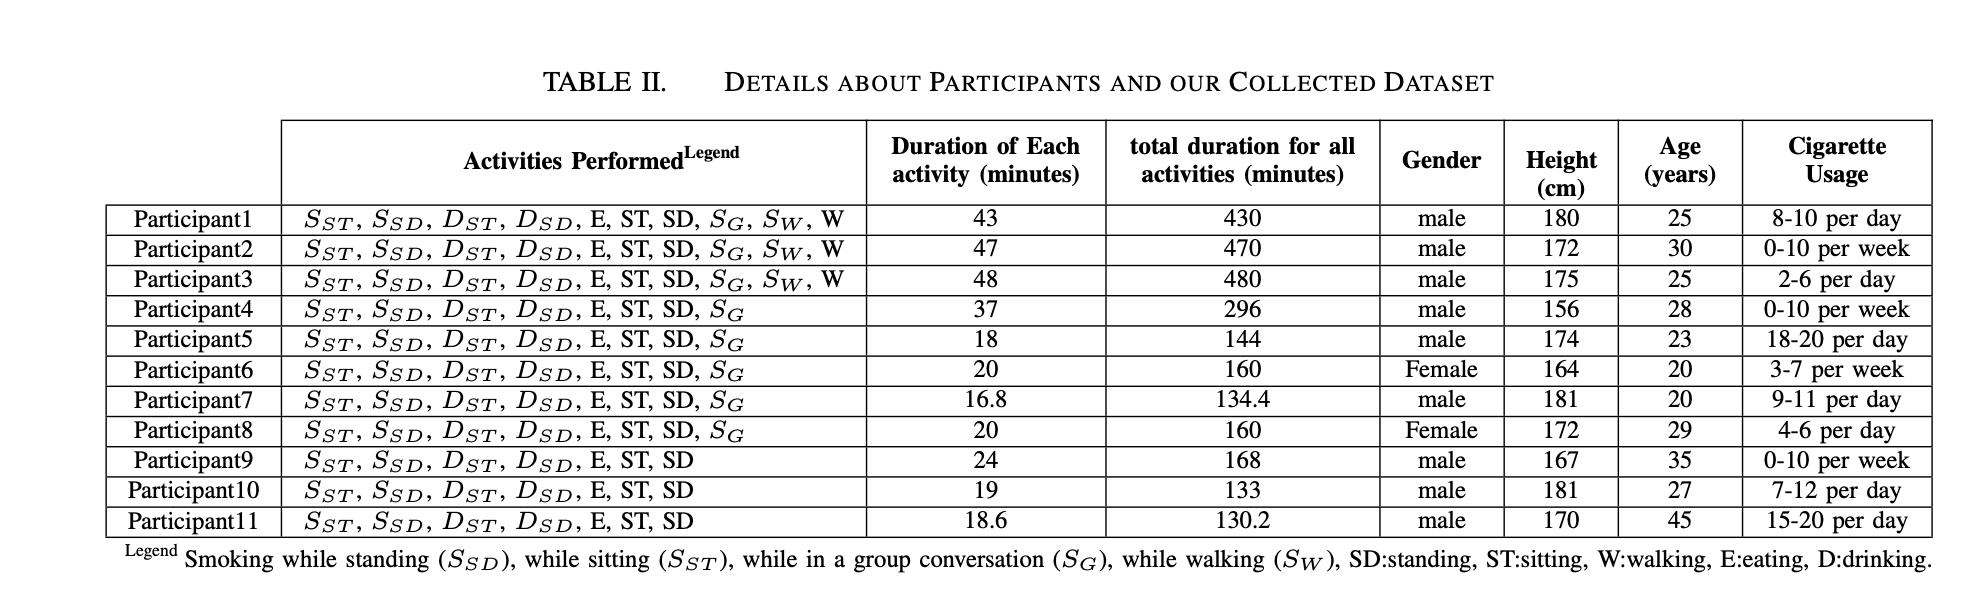

Participant 1-4 performed at least 10 sessions for each activity whereas participants 5-11 performed at least 5 sessions for each of their activities. A brief description about these activities are as follows:

- Smoking: There were four variants of this activity: smoking while sitting, standing, walking, and smoking in a group. Smoking in a group was done while standing in a smoking area where the participants were involved in a conversation with other smokers.


- Drinking: They had a cup of coffee or tea while sitting in our office lounge or standing outdoor. In all sessions, it was a group activity where two or more people were sitting or standing and drinking coffee while involved in a usual group conversation.


- Eating: During the eating activity, users had a cup of soup in their natural style while sitting alone in a lunch place. The participants used a spoon for eating soup which was in a cup on a table.


- Walking: Those participants who performed smoking while walking, also did walking as a separate activity.


- Sitting/Standing: Some of the participants performed sitting and standing for a few minutes.

Each participant wore a smart-watch (LG Watch R, LG Watch Urbane, Sony Watch 3) on the right wrist and a smartphone in the right pocket as all participants were right-handed

We collected data from multiple sensors from both smartwatch and smartphone, **however, we only use accelerometer and gy- roscope in this study**. The data was **collected at 50 samples per second** from these sensors. For data collection, we developed our own Android application which can collect data from multiple sensors, both from the phone and smartwatch in real- time at a user-provided sampling rate. In order to **label the start and end of the activities, participants were told to make a waving gesture.** The dataset and data logger can be accessed at [11].

In [21]:
!pwd

/Users/ddealmei/code/Dekkerz/mocap/notebooks


**Start with Participant 10** one of the smallest data sets in terms of duration 133 minutes in total

In [22]:
#Get the directory, one up + path to file
current_working_dir=os.getcwd()
print(current_working_dir)
filename = os.path.join('..','data','external','UT_Smoking_Data','Participant10_Data.xlsx')
filename

/Users/ddealmei/code/Dekkerz/mocap/notebooks
../data/external/UT_Smoking_Data/Participant10_Data.xlsx


In [29]:
%%time
#This may take awhile... there are no column headings so header=None
# execution time on Apple M1 Max with 64GB of memory
# CPU times: user 1min 6s, sys: 310 ms, total: 1min 6s
# Wall time: 1min 6s
p10_data=pd.read_excel(filename, header=None)

CPU times: user 1min 6s, sys: 310 ms, total: 1min 6s
Wall time: 1min 6s


As per the explanation: (Visually checks out using sample size = 5)

Watch 
- col 0 is the timestamp (unknown format at this point)
- col 1-3 Accelerometer(x,y,z)
- col 4-6 Linear acceleration sensor(x,y,z)
- col 7-9 Gyroscope(x,y,z)
- col 10-12 magnetometer(x,y,z)
- col 13 pressure sensor
- col 14 heartratesensor

- col 15 Empty colum

Phone
- col 16 timestamp (unknown format at this point)
- col 17-19 Accelerometer(x,y,z)
- col 20-22 Linear acceleration sensor(x,y,z)
- col 23-25 Gyroscope(x,y,z)
- col 26-28 magnetometer(x,y,z)
- col 29-30 gps(lat, long)
- col 31 class label

In [34]:
p10_data.sample(5)

0         1         2         3         4         5   \
229702  1459337407010 -8.111145 -3.934601  2.421845  0.047864  0.369522   
66539   1455110000000  4.440186 -7.998413  3.613663  0.089761  0.001100   
114265  1455107843623 -8.054382 -3.673279  2.406815  0.168113  0.713202   
288972  1458837494759 -8.849426 -1.857056  2.816238  0.030050  0.516745   
410681  1461602673028  9.750793 -1.716614 -0.394882 -0.027586  0.073234   

              6         7         8         9          10         11  \
229702 -0.014344 -0.144089 -0.043900  0.175674  31.057740  22.361755   
66539   0.138795 -0.066132  0.043396 -0.014633  -2.029419  45.584106   
114265  0.227131  0.136169  0.166473 -0.153442  32.955933  25.971985   
288972 -0.295541 -0.016571 -0.010864  0.023056  21.238708  14.601135   
410681 -0.036110  0.000351  0.000763  0.017822 -21.752930  84.307860   

               12          13  14  15             16        17        18  \
229702 -22.660828  1005.41394  52 NaN  1459337407012 -2.819412 -8.894087   
66539  -37.300110   989.33624  80 NaN  1455110000000  3.064578 -1.838747   
114265 -32.196045   989.33624  63 NaN  1455107843614  2.737690 -1.729784   
288972 -28.247070  1010.68280  59 NaN  1458837494766  6.238119 -4.317650   
410681  25.364685   997.30200   0 NaN  1461602673025 -1.579960 -9.275456   

              19        20        21        22        23        24        25  \
229702 -0.245166  0.508356  0.312037 -0.831363  0.003054  0.188146 -0.064752   
66539  -9.193735 -0.017764 -0.057473 -0.056085  0.023824  0.054367 -0.001833   
114265 -9.343558 -0.068167  0.002660 -0.107962  0.013134  0.023213 -0.002749   
288972 -6.701211  0.169460 -0.181107 -0.202693  0.010079  0.020769  0.005803   
410681  1.511859  0.061670  0.259032 -0.090947 -0.032681 -0.007941  0.001222   

             26       27       28         29        30       31  
229702  38.6875  25.1250   2.1250  52.238649  6.856671  DrinkSD  
66539    9.1875 -11.1875  57.9375  52.238760  6.857473  SmokeST  
114265   9.7500 -11.0625  58.6250  52.239127  6.857959  SmokeST  
288972  -4.2500   5.6875   8.1875  52.238826  6.856815  DrinkST  
410681 -10.3125  14.7500 -41.5625   0.000000  0.000000    Stand

Shape is 413000 rows, 32 cols

As per the research paper:

- Duration for each activity (patient specific) 19 minutes
- Total duration for all activities (patient specific) 133 minutes
- Sampling frequency of 50Hz

133 (minutes) x 60 (seconds) = 7980 seconds
50 (Hz) x 7980 seconds = 399000 observations **(Does not add up to the 413000 rows)**

413000/50 = 8260 seconds or 137.66666 minutes

In [100]:
p10_data[31].value_counts()

SmokeSD    59000
SmokeST    59000
Eat        59000
DrinkSD    59000
DrinkST    59000
Sit        59000
Stand      59000
Name: 31, dtype: int64

In [101]:
59000/50/60

19.666666666666668

In [35]:
p10_data.shape

(413000, 32)

Each participant wore a **smart-watch (LG Watch R, LG Watch Urbane, Sony Watch 3)** on the right wrist and a smartphone in the right pocket as all participants were right-handed.

Quick search indicates asteroidOS

https://asteroidos.org/install/bass/
https://asteroidos.org/wiki/documentation/

AsteroidOS is an open-source operating system for smartwatches based on Linux.

https://github.com/AsteroidOS

Could not find the logger mentioned in the research paper reference

***For reproducibility, we make our data logger and dataset publicly available.***

.... but based on the OS being linux based timestamp should be as follows:

In Linux, a timestamp is actually stored as a number of seconds instead of a date and time. This number of seconds refers to the amount of time since 00:00:00 on January 1, 1970, which is the time of Unix Epoch

https://www.geeksforgeeks.org%2Ffile-timestamps-mtime-ctime-and-atime-in-linux%2F&usg=AOvVaw0imIE2TNOalE0yDpi4t726


In [70]:
#Sampling rate is 50Hz so looking at the first 60 rows where timechange should have occurred after 50?
datetime_df=p10_data.iloc[0:60,0:1]
print(datetime_df.shape)
print(datetime_df.columns)
#have to /1000 as the timestamp appears to be in milliseconds
datetime_df[0].map(lambda x: datetime.datetime.fromtimestamp(x/1000))
# date seems to correspond with the timeframe 2016 however on row 60 we are still on the same minute/second 15:46:40

(60, 1)
Int64Index([0], dtype='int64')


0    2016-03-02 15:46:40
1    2016-03-02 15:46:40
2    2016-03-02 15:46:40
3    2016-03-02 15:46:40
4    2016-03-02 15:46:40
5    2016-03-02 15:46:40
6    2016-03-02 15:46:40
7    2016-03-02 15:46:40
8    2016-03-02 15:46:40
9    2016-03-02 15:46:40
10   2016-03-02 15:46:40
11   2016-03-02 15:46:40
12   2016-03-02 15:46:40
13   2016-03-02 15:46:40
14   2016-03-02 15:46:40
15   2016-03-02 15:46:40
16   2016-03-02 15:46:40
17   2016-03-02 15:46:40
18   2016-03-02 15:46:40
19   2016-03-02 15:46:40
20   2016-03-02 15:46:40
21   2016-03-02 15:46:40
22   2016-03-02 15:46:40
23   2016-03-02 15:46:40
24   2016-03-02 15:46:40
25   2016-03-02 15:46:40
26   2016-03-02 15:46:40
27   2016-03-02 15:46:40
28   2016-03-02 15:46:40
29   2016-03-02 15:46:40
30   2016-03-02 15:46:40
31   2016-03-02 15:46:40
32   2016-03-02 15:46:40
33   2016-03-02 15:46:40
34   2016-03-02 15:46:40
35   2016-03-02 15:46:40
36   2016-03-02 15:46:40
37   2016-03-02 15:46:40
38   2016-03-02 15:46:40
39   2016-03-02 15:46:40


In [98]:
p10_data.iloc[20:21,0:1]

0
20  1456930000000

In [99]:
#Repeat checking every n rows
n_increment=10
n_samples=20

for i in range (0,n_samples):
    p10_data.iloc[i*n_increment:i*n_increment+1,0:1].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))


TypeError: 'Series' object cannot be interpreted as an integer

In [54]:
#Convert from Linux timestamp for datetime




print(dt)
# 1970-01-01 09:00:00

print(type(dt))
# <class 'datetime.datetime'>

print(dt.tzinfo)
# None

1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
1456930000000
145693

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
data_1=pd.read_excel(X_path, header=None)
data_1

0          1         2         3         4         5   \
0       1455278271218  -5.973572 -6.710114  2.555145 -0.474457  0.382236   
1       1455278271238  -5.980713 -6.838654  2.605133 -0.471420  0.249793   
2       1455278271258  -6.025940 -6.895783  2.514679 -0.504273  0.187889   
3       1455278271279  -5.956909 -7.031464  2.752716 -0.424346  0.048824   
4       1455278271298  -5.959290 -6.900543  2.743195 -0.414628  0.176953   
...               ...        ...       ...       ...       ...       ...   
904395  1461602683308   9.681763 -1.978455 -0.256821 -0.134968 -0.414399   
904396  1461602683329   9.865051 -1.980835 -0.268723  0.076663 -0.508131   
904397  1461602683348  10.057861 -2.002258 -0.361557  0.315035 -0.547142   
904398  1461602683369  10.045959 -1.964172 -0.349655  0.272425 -0.496381   
904399  1461602683389   9.848389 -1.945129 -0.449631  0.069062 -0.442351   

              6         7         8         9   ...        22        23  \
0       0.345239 -0.014404 -0.001846 -0.028992  ... -0.161003  0.038790   
1       0.383285  0.001617 -0.005051 -0.027924  ... -0.136580  0.037568   
2       0.285115  0.009094 -0.015732 -0.027924  ... -0.116517  0.033292   
3       0.503679  0.019775 -0.015732 -0.015106  ... -0.053767  0.021380   
4       0.475054  0.006958 -0.013596 -0.004425  ... -0.207327  0.023824   
...          ...       ...       ...       ...  ...       ...       ...   
904395  0.267209  0.146683 -0.002441 -0.181915  ... -0.002465 -0.004276   
904396  0.216074  0.150955  0.010376 -0.156281  ... -0.061307 -0.004581   
904397  0.158731  0.115707  0.043488 -0.106079  ... -0.199140 -0.027489   
904398  0.132929  0.087936  0.065918 -0.056946  ... -0.022247 -0.046731   
904399 -0.048458  0.036667  0.092621  0.018890  ...  0.127224 -0.032070   

              24        25       26       27       28         29        30  \
0       0.006414 -0.004276  13.9375  39.0000 -26.2500  52.238673  6.857011   
1       0.025351 -0.010079  13.8750  39.0000 -26.2500  52.238673  6.857011   
2       0.027184 -0.009774  13.8750  38.6875 -26.2500  52.238673  6.857011   
3       0.025351 -0.009774  13.8125  38.8750 -26.2500  52.238673  6.857011   
4       0.053145 -0.015577  13.8125  38.6875 -26.2500  52.238673  6.857011   
...          ...       ...      ...      ...      ...        ...       ...   
904395 -0.078802 -0.013439 -10.6250  13.8125 -42.2500   0.000000  0.000000   
904396 -0.056505 -0.010385 -10.7500  14.0000 -42.0000   0.000000  0.000000   
904397 -0.047953 -0.010996 -10.5000  13.9375 -42.0625   0.000000  0.000000   
904398 -0.015272  0.004581 -10.3750  13.9375 -41.9375   0.000000  0.000000   
904399 -0.084299  0.004581 -10.4375  14.0000 -41.9375   0.000000  0.000000   

             31  
0       SmokeSD  
1       SmokeSD  
2       SmokeSD  
3       SmokeSD  
4       SmokeSD  
...         ...  
904395    Stand  
904396    Stand  
904397    Stand  
904398    Stand  
904399    Stand  

[904400 rows x 32 columns]

In [6]:
data_1[31].value_counts()

SmokeSD    129200
SmokeST    129200
Eat        129200
DrinkSD    129200
DrinkST    129200
Sit        129200
Stand      129200
Name: 31, dtype: int64

In [7]:
Data_2_path = os.path.join('UT_Smoking_Data','Participant1_Extra_SW_SG_W.xlsx')

In [8]:
data_2=pd.read_excel(Data_2_path, header=None)
data_2

0          1          2         3         4         5   \
0       1456400000000  -4.888123 -10.068817 -1.967560 -0.669430 -4.097033   
1       1456400000000  -4.100220  -9.966461 -2.557892  0.125600 -4.007766   
2       1456400000000  -4.431091  -7.474213 -2.177033 -0.191649 -1.523056   
3       1456400000000  -4.942871  -5.938873 -2.655487 -0.685983  0.013065   
4       1456400000000  -5.088074  -5.996002 -2.648346 -0.827633 -0.036409   
...               ...        ...        ...       ...       ...       ...   
387595  1455912036509  10.038818  -5.863220  1.783157  2.213460 -0.518417   
387596  1455912036529  10.193542  -4.701599  1.690323  2.118495  0.212620   
387597  1455912036549  11.521790  -4.380249  2.173538  3.122853 -0.055878   
387598  1455912036570  10.617249  -5.303833  2.152115  2.044861 -1.310019   
387599  1455912036589   9.846008  -6.127441  1.804581  1.154924 -2.367331   

              6         7         8         9   ...        22        23  \
0       0.556826 -0.430756  0.543533  0.119141  ... -1.402989  0.104458   
1       0.035729 -0.147705  0.275436  0.267609  ...  0.365564  0.833831   
2       0.431201  0.107574  0.164352  0.201385  ...  2.355843  0.783435   
3      -0.068670  0.226135  0.010544  0.056122  ...  3.352686  0.611782   
4      -0.080265  0.180206  0.025497 -0.035736  ...  1.753818  0.803899   
...          ...       ...       ...       ...  ...       ...       ...   
387595  0.432036  3.193527  0.017166 -3.198883  ... -0.272628 -0.003971   
387596  0.144244  2.142502 -0.151596 -2.956421  ... -0.230392  0.004887   
387597  0.500293  0.814835 -0.170822 -2.216217  ... -0.123937  0.024740   
387598  0.461239 -0.105881  0.038528 -1.671478  ...  0.252775  0.045509   
387599  0.124641 -0.614304  0.168839 -1.345703  ...  0.194161  0.108429   

              24        25       26       27       28         29        30  \
0      -0.787711 -0.444710 -19.6875  49.6250   8.0625  52.239067  6.856553   
1       0.356134 -0.416305 -20.0000  50.0625   7.3750  52.239067  6.856553   
2       1.454165 -0.320399 -20.1875  50.3750   6.6250  52.239067  6.856553   
3       0.894001 -0.126755 -20.5625  50.3750   6.0625  52.239067  6.856553   
4       0.402255 -0.008552 -20.8750  50.5000   5.6250  52.239067  6.856553   
...          ...       ...      ...      ...      ...        ...       ...   
387595 -0.265421  0.250149  -0.3750  46.5625  24.0625  52.239112  6.856619   
387596 -0.237627  0.332311  -0.1250  46.4375  24.2500  52.239112  6.856619   
387597 -0.197920  0.405920  -0.1875  46.1250  24.0625  52.239112  6.856619   
387598 -0.136834  0.453873  -0.0625  46.3125  23.8125  52.239112  6.856619   
387599 -0.012523  0.470672   0.5625  46.3125  23.9375  52.239112  6.856619   

             31  
0       SmokeWK  
1       SmokeWK  
2       SmokeWK  
3       SmokeWK  
4       SmokeWK  
...         ...  
387595  SmokeGP  
387596  SmokeGP  
387597  SmokeGP  
387598  SmokeGP  
387599  SmokeGP  

[387600 rows x 32 columns]

In [9]:
data_2[31].value_counts()

SmokeWK    129200
Walk       129200
SmokeGP    129200
Name: 31, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
data_1_SmokeSD = data_1.loc[data_1[31] == 'SmokeSD']
data_1_SmokeSD

0         1         2         3         4         5   \
0       1455278271218 -5.973572 -6.710114  2.555145 -0.474457  0.382236   
1       1455278271238 -5.980713 -6.838654  2.605133 -0.471420  0.249793   
2       1455278271258 -6.025940 -6.895783  2.514679 -0.504273  0.187889   
3       1455278271279 -5.956909 -7.031464  2.752716 -0.424346  0.048824   
4       1455278271298 -5.959290 -6.900543  2.743195 -0.414628  0.176953   
...               ...       ...       ...       ...       ...       ...   
129195  1455621991085  7.767944 -4.499268  0.007401  0.094020  1.162588   
129196  1455621991134  8.615356 -4.684937 -0.363937  0.876325  0.884037   
129197  1455621991134  8.615356 -4.684937 -0.363937  0.876325  0.884037   
129198  1455621991134  8.615356 -4.684937 -0.363937  0.876325  0.884037   
129199  1455621991184  8.315430 -5.096741 -0.337753  0.496988  0.366914   

              6         7         8         9   ...        22        23  \
0       0.345239 -0.014404 -0.001846 -0.028992  ... -0.161003  0.038790   
1       0.383285  0.001617 -0.005051 -0.027924  ... -0.136580  0.037568   
2       0.285115  0.009094 -0.015732 -0.027924  ... -0.116517  0.033292   
3       0.503679  0.019775 -0.015732 -0.015106  ... -0.053767  0.021380   
4       0.475054  0.006958 -0.013596 -0.004425  ... -0.207327  0.023824   
...          ...       ...       ...       ...  ...       ...       ...   
129195  0.528760  0.306900 -0.279099 -0.118210  ... -0.029537  0.019548   
129196  0.188726  0.283401 -0.160538 -0.288040  ...  0.050988  0.011606   
129197  0.188726  0.283401 -0.160538 -0.288040  ...  0.023693  0.011301   
129198  0.188726  0.283401 -0.160538 -0.288040  ...  0.076210  0.004276   
129199  0.177141  0.105026 -0.008865 -0.171616  ...  0.169196  0.012217   

              24        25       26       27       28         29        30  \
0       0.006414 -0.004276  13.9375  39.0000 -26.2500  52.238673  6.857011   
1       0.025351 -0.010079  13.8750  39.0000 -26.2500  52.238673  6.857011   
2       0.027184 -0.009774  13.8750  38.6875 -26.2500  52.238673  6.857011   
3       0.025351 -0.009774  13.8125  38.8750 -26.2500  52.238673  6.857011   
4       0.053145 -0.015577  13.8125  38.6875 -26.2500  52.238673  6.857011   
...          ...       ...      ...      ...      ...        ...       ...   
129195  0.034208  0.011301 -25.5000  49.3750 -14.0000  52.239026  6.856432   
129196  0.080023  0.001222 -25.3750  49.3125 -13.8750  52.239026  6.856432   
129197  0.111177 -0.007941 -25.3125  49.3125 -13.8125  52.239026  6.856432   
129198  0.134696 -0.002749 -25.1250  49.4375 -13.7500  52.239026  6.856432   
129199  0.169515 -0.005803 -24.8125  49.5000 -13.8125  52.239026  6.856432   

             31  
0       SmokeSD  
1       SmokeSD  
2       SmokeSD  
3       SmokeSD  
4       SmokeSD  
...         ...  
129195  SmokeSD  
129196  SmokeSD  
129197  SmokeSD  
129198  SmokeSD  
129199  SmokeSD  

[129200 rows x 32 columns]

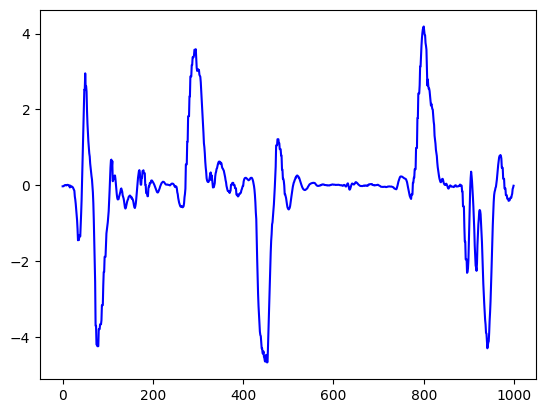

In [61]:
plt.plot(data_1_SmokeSD.iloc[:1000, 9],'b', label="X" )

**Watch Data**

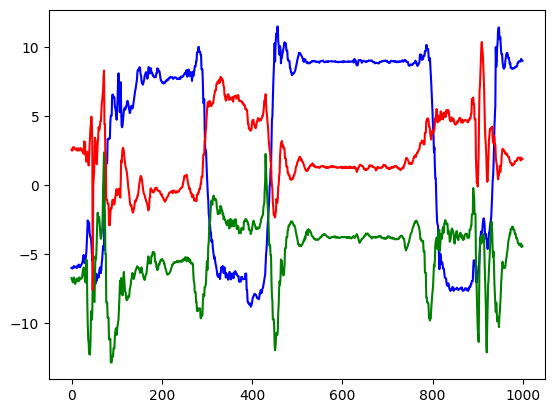

In [66]:
#Accelerometer(x,y,z)
plt.plot(data_1_SmokeSD.iloc[:1000, 1],'b', label="X" )
plt.plot(data_1_SmokeSD.iloc[:1000, 2],'g', label="Y" )
plt.plot(data_1_SmokeSD.iloc[:1000, 3],'r', label="Z" )

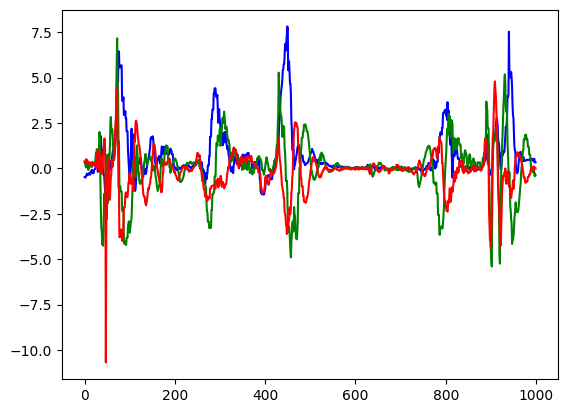

In [67]:
#Linear acceleration sensor(x,y,z)
plt.plot(data_1_SmokeSD.iloc[:1000, 4],'b', label="X" )
plt.plot(data_1_SmokeSD.iloc[:1000, 5],'g', label="Y" )
plt.plot(data_1_SmokeSD.iloc[:1000, 6],'r', label="Z" )

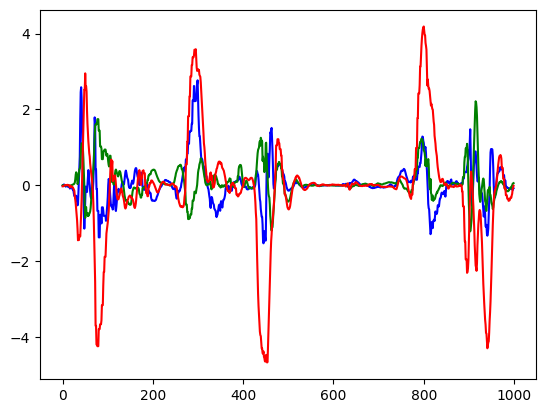

In [68]:
#Gyroscope(x,y,z)
plt.plot(data_1_SmokeSD.iloc[:1000, 7],'b', label="X" )
plt.plot(data_1_SmokeSD.iloc[:1000, 8],'g', label="Y" )
plt.plot(data_1_SmokeSD.iloc[:1000, 9],'r', label="Z" )

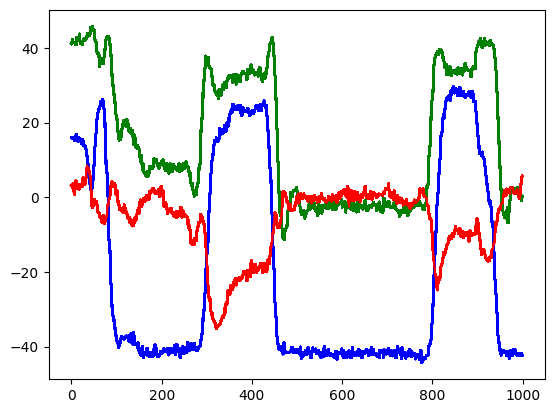

In [65]:
#magnetometer(x,y,z)
plt.plot(data_1_SmokeSD.iloc[:1000, 10],'b', label="X" )
plt.plot(data_1_SmokeSD.iloc[:1000, 11],'g', label="Y" )
plt.plot(data_1_SmokeSD.iloc[:1000, 12],'r', label="Z" )

**Phone Data**

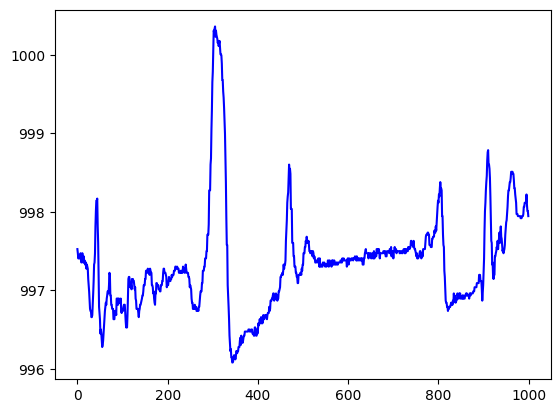

In [73]:
#pressure
plt.plot(data_1_SmokeSD.iloc[:1000, 13],'b', label="X" )


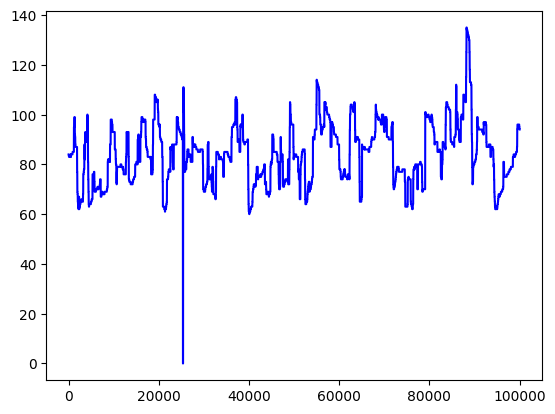

In [77]:
#magnetometer(x,y,z)
plt.plot(data_1_SmokeSD.iloc[:100000, 14],'b', label="X" )

